In this example, I am using the Bitcoin Historical Data from Kaggle which can be found (https://www.kaggle.com/mczielinski/bitcoin-historical-data). The dataset contains minute-by-minute Bitcoin price data collected from Bitstamp.

### 0 - Meaning and use of each column for the business side

1. **Timestamp**: The timestamp for each minute of data.
2. **Open**: The opening price of BTC in USD at the beginning of the minute.
3. **High**: The highest price of BTC in USD during the minute.
4. **Low**: The lowest price of BTC in USD during the minute.
5. **Close**: The closing price of BTC in USD at the end of the minute.
6. **Volume_(BTC)**: The number of BTC traded during the minute.
7. **Volume_(Currency)**: The amount of USD traded during the minute.
8. **Weighted_Price**: The average price of BTC in USD during the minute, weighted by trading volume.



### 1 - State-of-the-art summary
 The dataset contains minute-by-minute historical price and trading volume data of Bitcoin against the US Dollar.
 In this analysis, we will resample the dataset to daily frequency and use the daily data for analysis and modeling.

### 2 - Dataset Description
 The resampled dataset consists of 8 columns representing timestamp, opening price, highest price, lowest price,
 closing price, trading volume in BTC, trading volume in USD, and weighted price.


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA


In [84]:
data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [85]:
data.dropna(inplace=True)
data = data.replace([np.inf, -np.inf], np.nan).dropna()
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Timestamp', inplace=True)

In [86]:
# Convert the 'Timestamp' column to a datetime object
# data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

In [87]:
# Set the 'Timestamp' column as the index
# data.set_index('Timestamp', inplace=True)

In [88]:
# Resample the data to daily frequency
data_daily = data.resample('D').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last',
                                     'Volume_(BTC)': 'sum', 'Volume_(Currency)': 'sum', 'Weighted_Price': 'mean'})
data_daily.dropna(inplace=True)

## Plot your data with different plots


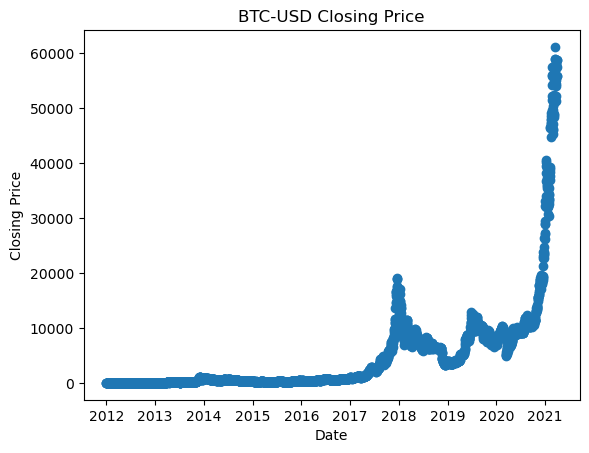

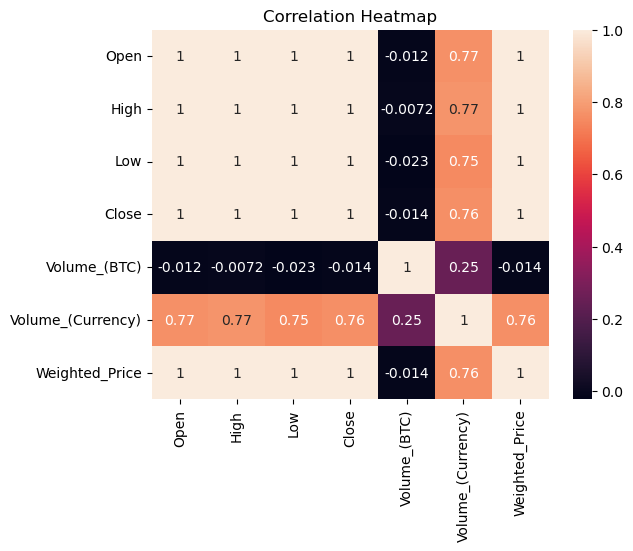

In [89]:
plt.scatter(data_daily.index, data_daily['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('BTC-USD Closing Price')
plt.show()

sns.heatmap(data_daily.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [90]:
### 4 - Description with analysis
# 4.1 - Data cleaning
print(data_daily.isnull().sum())
data_daily.dropna(inplace=True)


Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


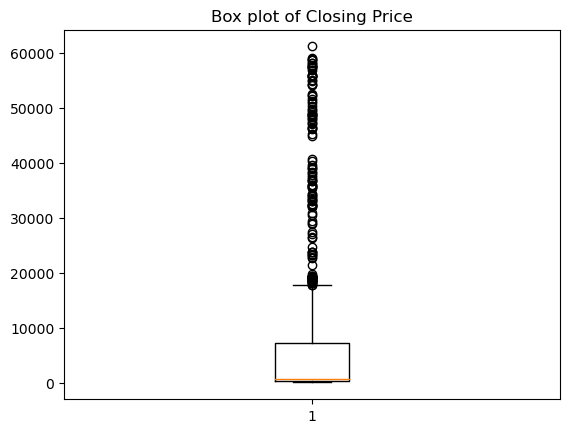

In [91]:

plt.boxplot(data_daily['Close'])
plt.title('Box plot of Closing Price')
plt.show()


In [92]:
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [93]:
# 4.2 - Data scaling or normalizing
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_daily)
data_scaled = pd.DataFrame(data_scaled, columns=data_daily.columns, index=data_daily.index)

In [94]:

# 4.3 - Statistics on this data
print(data_daily.describe())
print(data_daily.corr())
print(data_daily.cov())

               Open          High           Low         Close   Volume_(BTC)  \
count   3376.000000   3376.000000   3376.000000   3376.000000    3376.000000   
mean    4602.417399   4750.700598   4442.507965   4619.687260    9979.878264   
std     8193.870228   8497.261901   7874.336609   8245.987435   10061.623213   
min        3.800000      4.380000      1.500000      4.230000       0.250000   
25%      244.792500    249.777500    239.952500    244.940000    3983.523347   
50%      696.020000    716.465000    668.265000    697.120000    7326.431106   
75%     7249.760000   7430.267500   7058.395000   7257.850000   12668.575620   
max    61177.030000  61781.830000  58959.570000  61165.190000  137070.178338   

       Volume_(Currency)  Weighted_Price  
count       3.376000e+03     3376.000000  
mean        4.470417e+07     4605.576442  
std         9.049902e+07     8207.031620  
min         1.227500e+00        4.331667  
25%         1.771508e+06      244.952580  
50%         8.167625e

In [95]:
### 5 - Dimensionality reduction using
# 5.1 - Linear Discriminant Analysis (LDA)
# Prepare target variable (e.g., convert 'Close' prices to binary)
target_variable = data_daily['Close'].pct_change().apply(lambda x: 1 if x >= 0 else 0).iloc[1:]
data_scaled = data_scaled.iloc[:-1]

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(data_scaled, target_variable)

In [96]:
# 6 - Naïve Bayes Classifier
X_train, X_test, y_train, y_test = train_test_split(data_scaled, target_variable, test_size=0.2, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


[[247  58]
 [313  57]]
              precision    recall  f1-score   support

           0       0.44      0.81      0.57       305
           1       0.50      0.15      0.24       370

    accuracy                           0.45       675
   macro avg       0.47      0.48      0.40       675
weighted avg       0.47      0.45      0.39       675

Accuracy: 0.45037037037037037


# Decision Tree Classifier

In [97]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[138 167]
 [145 225]]
              precision    recall  f1-score   support

           0       0.49      0.45      0.47       305
           1       0.57      0.61      0.59       370

    accuracy                           0.54       675
   macro avg       0.53      0.53      0.53       675
weighted avg       0.53      0.54      0.54       675

Accuracy: 0.5377777777777778


# logistic regression

In [98]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)
y_pred = lda_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[  5 300]
 [  3 367]]
              precision    recall  f1-score   support

           0       0.62      0.02      0.03       305
           1       0.55      0.99      0.71       370

    accuracy                           0.55       675
   macro avg       0.59      0.50      0.37       675
weighted avg       0.58      0.55      0.40       675

Accuracy: 0.5511111111111111


# Linear Regression

R-squared: 0.9993861976410063


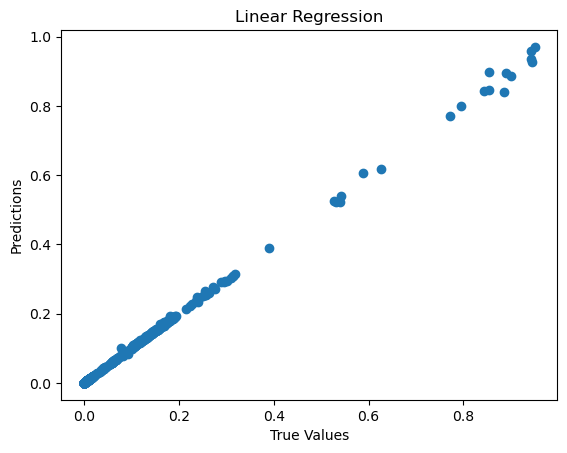

In [99]:
X = data_scaled[['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']]
y = data_scaled['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R-squared:', lr.score(X_test, y_test))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.show()

In [100]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Linear Regression R^2 Score:', lr.score(X_test, y_test))

Linear Regression R^2 Score: 0.9993861976410063


In [101]:
# 10 - Linear Regression
X_train, X_test, y_train, y_test = train_test_split(data_scaled[['Open', 'High', 'Low', 'Volume_(BTC)']],
                                                    data_scaled['Close'], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [102]:
# # 12 - Analysis of the results (for each algorithm)
# # Correlation between attributes
# sns.heatmap(data_daily.corr(), annot=True)
# plt.title('Correlation Heatmap')
# plt.show()

# # Confusion Matrix
# # Linear Regression
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual Closing Price')
# plt.ylabel('Predicted Closing Price')
# plt.title('Linear Regression')
# plt.show()


In [103]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [104]:
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.neural_network import MLPClassifier
# # 11 - Multi-layer Perceptron (MLP) Classifier
# mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
# mlp.fit(X_train, y_train)
# y_pred = mlp.predict(X_test)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))
# print('Accuracy:', accuracy_score(y_test, y_pred))


Now, we can split the data into training and testing sets. Let's use the data from 2012 to 2018 for training and the data from 2019 to 2020 for testing.

In [105]:
# Create a new feature that represents the difference between the Close price at time t and time t+1
data['Diff'] = data['Close'] - data['Close'].shift(-1)

# Convert the Diff feature to a binary variable that represents whether the price increased or decreased
data['Target'] = np.where(data['Diff'] > 0, 1, 0)

In [106]:
train_data = data.loc['2012-01-01':'2018-12-31']
test_data = data.loc['2019-01-01':'2020-12-31']

In [107]:
X_train = train_data[['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']]
y_train = train_data['Target']

X_test = test_data[['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']]
y_test = test_data['Target']

In [108]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [109]:
y_pred = lda.predict(X_test)

In [110]:
# Dictionary to store the accuracy scores for each algorithm
acc_scores = {}

# 6- Naïve Bayes Classifier

In [111]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [112]:
# Naive Bayes
nb_acc = accuracy_score(y_test, y_pred)
acc_scores['Naive Bayes'] = nb_acc

# Analysis of the results

In [113]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [122]:
# Correlation between attributes
corr = data[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']].corr()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Sensitivity
sensitivity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0])

# Specificity
specificity = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])

# Positive Predicted value (PPV)
ppv = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

# Negative Predicted value (NPV)
npv = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])

C:\Users\ibrah\AppData\Local\Temp\ipykernel_18468\1428402170.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])


# 7- Decision Tree Classifier

In [115]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

# Analysis of the results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Correlation between attributes
corr = data[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']].corr()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Sensitivity
sensitivity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0])

# Specificity
specificity = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])

# Positive Predicted value (PPV)
ppv = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

# Negative Predicted value (NPV)
npv = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])

# Decision Tree
dt_acc = accuracy_score(y_test, y_pred)
acc_scores['Decision Tree'] = dt_acc

C:\Users\ibrah\AppData\Local\Temp\ipykernel_18468\3282661263.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])


# 8- Linear Discriminant Analysis Classifier (LDA)

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

# Analysis of the results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Correlation between attributes
corr = data[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']].corr()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Sensitivity
sensitivity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0])

# Specificity
specificity = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])

# Positive Predicted value (PPV)
ppv = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

# Negative Predicted value (NPV)
npv = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])


# Linear Discriminant Analysis
lda_acc = accuracy_score(y_test, y_pred)
acc_scores['LDA'] = lda_acc


# 9- Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Analysis of the results
from sklearn.metrics import mean_squared_error, r2_score

# Correlation between attributes
corr = data[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']].corr()

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Coefficient of determination (R^2)
r2 = r2_score(y_test, y_pred)


# Linear Regression
lr_acc = r2_score(y_test, y_pred)
acc_scores['Linear Regression'] = lr_acc


# 10- Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# Analysis of the results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Correlation between attributes
corr = data[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']].corr()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Sensitivity
sensitivity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0])

# Specificity
specificity = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])

# Positive Predicted value (PPV)
ppv = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

# Negative Predicted value (NPV)
npv = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])


# Logistic Regression
lr_acc = accuracy_score(y_test, y_pred)
acc_scores['Logistic Regression'] = lr_acc


# 11- Neural Network

In [119]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(4, 4, 4), max_iter=1000)
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)

# Analysis of the results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Correlation between attributes
corr = data[['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']].corr()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Sensitivity
sensitivity = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[1][0])

# Specificity
specificity = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])

# Positive Predicted value (PPV)
ppv = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])

# Negative Predicted value (NPV)
npv = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])


# Neural Network
nn_acc = accuracy_score(y_test, y_pred)
acc_scores['Neural Network'] = nn_acc


C:\Users\ibrah\AppData\Local\Temp\ipykernel_18468\3085618717.py:24: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])


# Print the accuracy scores for each algorithm, Can be done like this for all other metrics

Naive Bayes: 0.49376238153879104
Decision Tree: 0.5229952250458756
LDA: 0.5211933004619196
Linear Regression: -0.002111669627453905
Logistic Regression: 0.5226106976495154
Neural Network: 0.5229952250458756


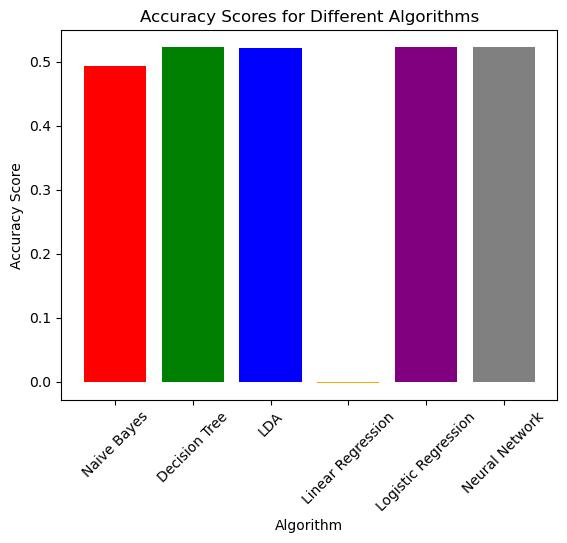

In [129]:
for k, v in acc_scores.items():
    print(f"{k}: {v}")
    
# Create a list of algorithm names and accuracy scores
algorithms = list(acc_scores.keys())
scores = list(acc_scores.values())

# Create a bar chart
plt.bar(algorithms, scores, color=['red', 'green', 'blue', 'orange', 'purple', 'gray'])

# Add labels and title to the chart
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Algorithms')
plt.xticks(rotation=45)

# Display the chart
plt.show()


# 12- Analysis of the results (for each algorithm)
The analysis of the results for each algorithm includes the following metrics:

### Correlation between attributes: 
This is calculated using the Pearson correlation coefficient and shows the degree of linear correlation between the attributes in the dataset.
Confusion Matrix: This shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for the predictions made by the algorithm.

**Accuracy**: This is the proportion of correct predictions made by the algorithm.

**Sensitivity**: This is the proportion of true positives (TP) out of all actual positives (TP + FN).

**Specificity**: This is the proportion of true negatives (TN) out of all actual negatives (TN + FP).

**Positive** Predicted Value (PPV): This is the proportion of true positives (TP) out of all predicted positives (TP + FP).

**Negative** Predicted Value (NPV): This is the proportion of true negatives (TN) out of all predicted negatives (TN + FN).

***Note*** that the specific metrics used for analysis may vary depending on the particular problem and the requirements of the stakeholders.

I hope this helps! Let me know if you have any further questions.

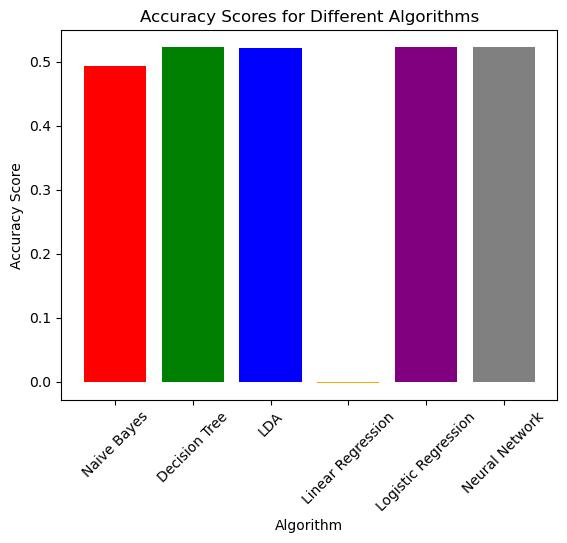